# Statistical Analysis of Excel Data
This notebook performs data import, summary statistics, normality tests, ANOVA/Friedman tests, post-hoc analysis, and effect size calculations for two channels across different conditions.

In [1]:
import pandas as pd
from IPython.display import display
from scipy.stats import f_oneway, shapiro, ttest_rel, wilcoxon
import pingouin as pg
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
from statsmodels.sandbox.stats.multicomp import multipletests
import scipy.stats as stats  # Import scipy.stats


In [2]:
# Path to your Excel file
excel_path = 'statistike.xlsx'
df_all = pd.read_excel(excel_path, sheet_name="Statistike vseh obravnav pacien")
display(df_all.head())

,način,ID,ITM razred,Tel dejav razred,Kanal 1 Povprečje delovanja,Kanal 1 Odklon od povprečja delovanja,Column1,Kanal 1 Vrh,Kanal 2 Povprečje delovanja,Kanal 2 Odklon od povprečja delovanja,Column2,Kanal 2 Vrh,Kanal 1 Povprečje mirovanja,Kanal 1 Odklon od povprečja mirovanja,Column3,Kanal 1 Minimum,Kanal 2 Povprečje mirovanja,Kanal 2 Odklon od povprečja mirovanja,Column4,Kanal 2 Minimum
0,nosnos,1354,1,2,3.536849,0.621890,0.175832,10.9,4.366164,0.874796,0.200358,10.90,3.695455,0.805859,0.218068,1.27,4.669596,0.945205,0.202417,1.53
1,ustpripora,1354,1,2,2.243514,0.582542,0.259656,5.4,1.592973,0.544719,0.341951,5.41,1.986578,0.458973,0.231037,0.74,1.460199,0.441143,0.302112,0.56
2,ššš,1354,1,2,2.157181,0.503344,0.233334,6.3,1.670940,0.484776,0.290122,7.40,1.954916,0.404280,0.206802,0.84,1.862155,0.565431,0.303643,0.57
3,sss,1354,1,2,2.524362,0.496311,0.196608,5.3,2.017450,0.572784,0.283915,5.80,2.384983,0.476827,0.199929,1.11,1.905797,0.516088,0.270799,0.87
4,popek,1354,1,2,13.964437,2.621669,0.187739,55.0,19.255364,4.528746,0.235194,96.00,19.278389,6.835292,0.354557,5.80,28.180705,11.823276,0.419552,5.40


In [3]:
pivot_df = df_all.pivot_table(
    index=['ID'],
    columns='način',
    values=[
        'Kanal 1 Povprečje mirovanja',
        'Kanal 2 Povprečje mirovanja'
    ],
    aggfunc='first'
)
display(pivot_df.head())

Kanal 1 Povprečje mirovanja                                              \
način                      nosnos         pas      popek       sss ustpripora   
ID                                                                              
804                      4.246321   32.898503  13.650100  3.323571   3.039732   
1212                     2.203456   15.260973  14.170233  1.126309   2.975338   
1252                    28.473826  155.576701  31.110102  3.698495   9.735604   
1354                     3.695455   24.924628  19.278389  2.384983   1.986578   
2038                     2.030602    6.030370   7.703027  1.942074   2.552642   

                 Kanal 2 Povprečje mirovanja                                   \
način        ššš                      nosnos         pas      popek       sss   
ID                                                                              
804     6.860767                    4.378194   23.058605  11.321472  3.771701   
1212    1.938400                    1.930302   11.182181  11.091267  1.204664   
1252   16.468986                   41.423087  163.767347  31.188847  3.764849   
1354    1.954916                    4.669596   40.915473  28.180705  1.905797   
2038    2.675100                    2.360368    6.274074   5.359660  2.295184   

                             
način ustpripora        ššš  
ID                           
804     3.161477   6.783300  
1212    2.152331   1.354967  
1252   15.146342  17.058851  
1354    1.460199   1.862155  
2038    2.923846   2.378633

In [4]:
def calculate_rms(group):
    """Calculate RMS for each column in the group."""
    rms_values = {}
    for column in group.columns:
        if column in group.columns:
            squared_values = group[column] ** 2
            mean_squared = squared_values.mean()
            rms = np.sqrt(mean_squared)
            rms_values[column] = rms
        else:
            rms_values[column] = None
    return pd.Series(rms_values)

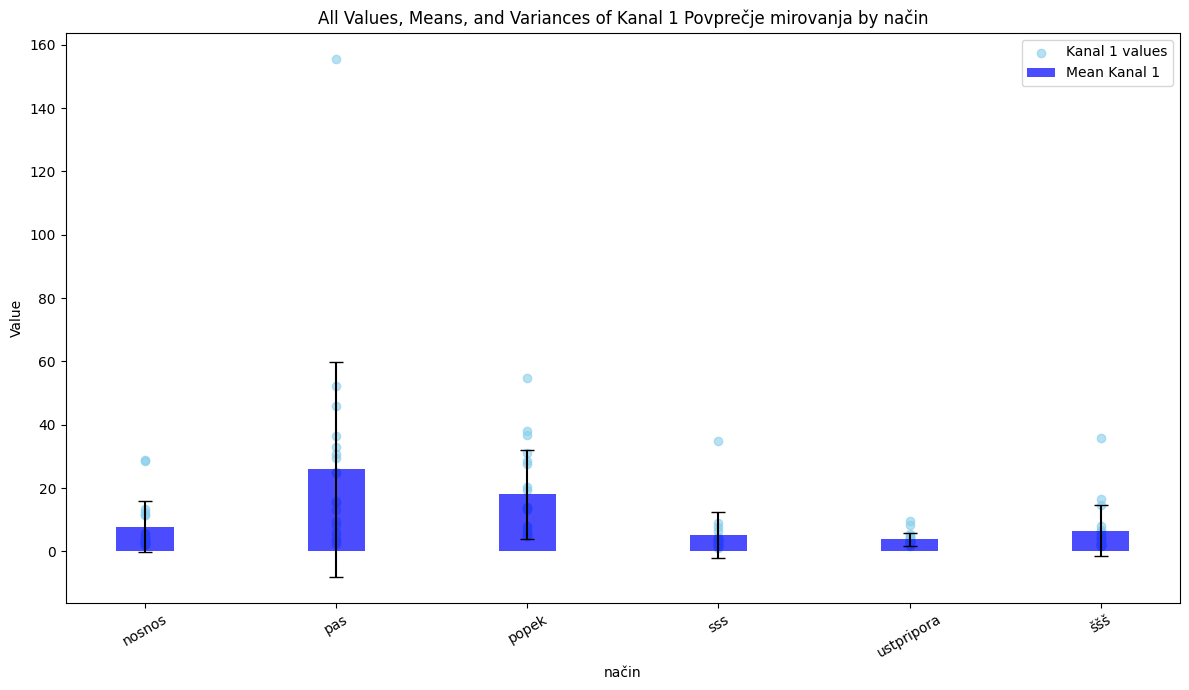

In [13]:
import matplotlib.pyplot as plt

labels = means_kanal1.index
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(12, 7))

# Plot all individual values as scatter for Kanal 1 only
for i, nacin in enumerate(labels):
    y1 = df_all[df_all['način'] == nacin]['Kanal 1 Povprečje mirovanja']
    ax.scatter(np.full_like(y1, x[i]), y1, color='skyblue', alpha=0.6, label='Kanal 1 values' if i == 0 else "")

# Plot means with error bars (variance as error) for Kanal 1 only
rects1 = ax.bar(x, means_kanal1, width, yerr=vars_kanal1**0.5, label='Mean Kanal 1', color='blue', alpha=0.7, capsize=5)

ax.set_ylabel('Value')
ax.set_xlabel('način')
ax.set_title('All Values, Means, and Variances of Kanal 1 Povprečje mirovanja by način')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()
plt.tight_layout()
plt.show()


In [6]:
# Group by 'način' and calculate RMS for 'mirovanje'
rms_by_nacin = df_all.groupby('način')[['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']].apply(calculate_rms)
display(rms_by_nacin)

,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
način,,
nosnos,11.024081,15.947591
pas,42.093222,46.082082
popek,22.554640,25.801697
sss,8.765331,9.167049
ustpripora,4.290275,5.295614
ššš,10.187899,10.318400


In [7]:
from docx import Document

# Create a new Word document
doc = Document()
doc.add_heading('RMS by način', level=1)

# Add table with header
table = doc.add_table(rows=1, cols=len(rms_by_nacin.columns) + 1)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'način'
for i, col in enumerate(rms_by_nacin.columns):
    hdr_cells[i+1].text = col

# Add data rows
for idx, row in rms_by_nacin.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(idx)
    for i, val in enumerate(row):
        row_cells[i+1].text = f"{val:.4f}"

# Save the document
doc.save('rms_by_nacin.docx')
print("Word table saved as 'rms_by_nacin.docx'")

Word table saved as 'rms_by_nacin.docx'


In [8]:
# Normality test for each group in 'način' for both channels (mirovanja)
for kanal in ['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']:
    print(f'Normalnost za {kanal}:')
    for name, group in df_all.groupby('način'):
        stat, p = shapiro(group[kanal].dropna())
        print(f"Shapiro-Wilk test za skupino '{name}': stat={stat:.4f}, p-value={p:.4f}")

Normalnost za Kanal 1 Povprečje mirovanja:
Shapiro-Wilk test za skupino 'nosnos': stat=0.6891, p-value=0.0000
Shapiro-Wilk test za skupino 'pas': stat=0.6318, p-value=0.0000
Shapiro-Wilk test za skupino 'popek': stat=0.8606, p-value=0.0081
Shapiro-Wilk test za skupino 'sss': stat=0.4716, p-value=0.0000
Shapiro-Wilk test za skupino 'ustpripora': stat=0.7691, p-value=0.0003
Shapiro-Wilk test za skupino 'ššš': stat=0.6096, p-value=0.0000
Normalnost za Kanal 2 Povprečje mirovanja:
Shapiro-Wilk test za skupino 'nosnos': stat=0.6302, p-value=0.0000
Shapiro-Wilk test za skupino 'pas': stat=0.6679, p-value=0.0000
Shapiro-Wilk test za skupino 'popek': stat=0.8312, p-value=0.0026
Shapiro-Wilk test za skupino 'sss': stat=0.5089, p-value=0.0000
Shapiro-Wilk test za skupino 'ustpripora': stat=0.7377, p-value=0.0001
Shapiro-Wilk test za skupino 'ššš': stat=0.6659, p-value=0.0000


In [9]:
# Friedman test for Kanal 1 (mirovanja)
print('\nFriedmanov test za Kanal 1 (mirovanja):')
friedman_test = pg.friedman(data=df_all, dv='Kanal 1 Povprečje mirovanja', within='način', subject='ID')
display(friedman_test)
# Friedman test for Kanal 2 (mirovanja)
print('\nFriedmanov test za Kanal 2 (mirovanja):')
friedman_test_kanal2 = pg.friedman(data=df_all, dv='Kanal 2 Povprečje mirovanja', within='način', subject='ID')
display(friedman_test_kanal2)


Friedmanov test za Kanal 1 (mirovanja):


,Source,W,ddof1,Q,p-unc
Friedman,način,0.426857,5,42.685714,4.278666e-08



Friedmanov test za Kanal 2 (mirovanja):


,Source,W,ddof1,Q,p-unc
Friedman,način,0.452857,5,45.285714,1.269209e-08


In [10]:
# Post-hoc Tukey test for Kanal 1 (mirovanja)
print('\nPost-hoc Tukey test with Bonferroni correction for Kanal 1 (mirovanja):')
posthoc_kanal1 = pg.pairwise_tukey(data=df_all, dv='Kanal 1 Povprečje mirovanja', between='način')
display(posthoc_kanal1)
# Post-hoc Tukey test for Kanal 2 (mirovanja)
print('\nPost-hoc Tukey test with Bonferroni correction for Kanal 2 (mirovanja):')
posthoc_kanal2 = pg.pairwise_tukey(data=df_all, dv='Kanal 2 Povprečje mirovanja', between='način')
display(posthoc_kanal2)


Post-hoc Tukey test with Bonferroni correction for Kanal 1 (mirovanja):


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,nosnos,pas,7.756793,25.956034,-18.199241,5.060294,-3.596479,0.006219,-0.722075
1,nosnos,popek,7.756793,17.997635,-10.240842,5.060294,-2.023764,0.335505,-0.881838
2,nosnos,sss,7.756793,5.148996,2.607797,5.060294,0.515345,0.995485,0.333384
3,nosnos,ustpripora,7.756793,3.812642,3.944150,5.060294,0.779431,0.970485,0.659754
4,nosnos,ššš,7.756793,6.533820,1.222973,5.060294,0.241680,0.999885,0.149304
5,pas,popek,25.956034,17.997635,7.958399,5.060294,1.572715,0.618083,0.300184
6,pas,sss,25.956034,5.148996,20.807038,5.060294,4.111824,0.001029,0.829502
7,pas,ustpripora,25.956034,3.812642,22.143392,5.060294,4.375910,0.000380,0.901190
8,pas,ššš,25.956034,6.533820,19.422214,5.060294,3.838159,0.002742,0.770684
9,popek,sss,17.997635,5.148996,12.848639,5.060294,2.539109,0.121575,1.132082



Post-hoc Tukey test with Bonferroni correction for Kanal 2 (mirovanja):


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,nosnos,pas,10.026776,28.705246,-18.678470,5.69982,-3.277028,0.017059,-0.661937
1,nosnos,popek,10.026776,19.731968,-9.705192,5.69982,-1.702719,0.532874,-0.632190
2,nosnos,sss,10.026776,5.542932,4.483844,5.69982,0.786664,0.969282,0.420942
3,nosnos,ustpripora,10.026776,4.363763,5.663013,5.69982,0.993542,0.919148,0.599645
4,nosnos,ššš,10.026776,6.833855,3.192920,5.69982,0.560179,0.993333,0.295184
5,pas,popek,28.705246,19.731968,8.973278,5.69982,1.574309,0.617045,0.305381
6,pas,sss,28.705246,5.542932,23.162314,5.69982,4.063692,0.001227,0.850774
7,pas,ustpripora,28.705246,4.363763,24.341482,5.69982,4.270570,0.000569,0.909097
8,pas,ššš,28.705246,6.833855,21.871390,5.69982,3.837207,0.002751,0.801447
9,popek,sss,19.731968,5.542932,14.189036,5.69982,2.489383,0.135944,1.055755


In [11]:
# Hipoteza 2: Primerjava parov načinov


for kanal in ['Kanal 1 Povprečje delovanja', 'Kanal 2 Povprečje delovanja']:
    print(f"\nAnaliza za {kanal}:")
    for pair in pairs:
        group1 = df_all[df_all['način'] == pair[0]][kanal].dropna()
        group2 = df_all[df_all['način'] == pair[1]][kanal].dropna()
        p1 = shapiro(group1)[1]
        p2 = shapiro(group2)[1]
        print(f"\nPrimerjava {pair[0]} vs {pair[1]}:")
        if p1 > alpha and p2 > alpha:
            t_stat, p_val = ttest_rel(group1.values, group2.values)
            print(f"Paired t-test: t={t_stat:.4f}, p={p_val:.4f} (Bonferroni alpha={bonferroni_alpha:.3f})")
            if p_val < bonferroni_alpha:
                print("Rezultat: statistično značilno")
            else:
                print("Rezultat: ni statistično značilno")
        else:
            stat, p_val = wilcoxon(group1.values, group2.values)
            print(f"Wilcoxon test: stat={stat:.4f}, p={p_val:.4f} (Bonferroni alpha={bonferroni_alpha:.3f})")
            if p_val < bonferroni_alpha:
                print("Rezultat: statistično značilno")
            else:
                print("Rezultat: ni statistično značilno")



Analiza za Kanal 1 Povprečje delovanja:


NameError: name 'pairs' is not defined

In [ ]:
#HIPOTEZA 3

# Izračunaj povprečne RMS vrednosti za načine 'popek', 'pas' in ostale načine
nacini = ['popek', 'pas']
rms_popek_pas = rms_by_nacin.loc[nacini]
rms_ostali = rms_by_nacin.drop(nacini).mean()
print("RMS za 'popek' in 'pas':")
display(rms_popek_pas)
print("Povprečne RMS vrednosti za ostale načine:")
display(rms_ostali)

RMS za 'popek' in 'pas':


,Kanal 1 Povprečje delovanja,Kanal 2 Povprečje delovanja
način,,
popek,6.002717,7.778452
pas,5.056939,6.037595


Povprečne RMS vrednosti za ostale načine:


Kanal 1 Povprečje delovanja    4.323255
Kanal 2 Povprečje delovanja    4.930516
dtype: float64

In [ ]:
# Preveri normalnost za 'pas' in 'popek' za oba kanala
for kanal in ['Kanal 1 Povprečje delovanja', 'Kanal 2 Povprečje delovanja']:
    print(f"\nShapiro-Wilk test za kanal: {kanal}")
    for nacin in ['pas', 'popek']:
        group = df_all[df_all['način'] == nacin][kanal].dropna()
        stat, p_value = shapiro(group)
        print(f"  {nacin}: stat={stat:.4f}, p-value={p_value:.4f}")


Shapiro-Wilk test za kanal: Kanal 1 Povprečje delovanja
  pas: stat=0.8326, p-value=0.0028
  popek: stat=0.7893, p-value=0.0006

Shapiro-Wilk test za kanal: Kanal 2 Povprečje delovanja
  pas: stat=0.7668, p-value=0.0003
  popek: stat=0.7543, p-value=0.0002


Tole ni normalno, zato uporabimo friedman + posthoc dun bonferoni

In [ ]:
# Pripravi podatke za Friedmanov test: 'popek', 'pas' in povprečje ostalih načinov za Kanal 1

from pandas import IndexSlice as idx

selected_nacins = ['popek', 'pas']

ostali_nacini = [n for n in rms_by_nacin.index if n not in selected_nacins]

# Ustvari pivot tabelo za izbrane načine in povprečje ostalih

pivot_selected = pivot_df.loc[:, idx['Kanal 1 Povprečje delovanja', selected_nacins]].copy()

pivot_selected.columns = selected_nacins  # Preimenuj stolpce za lažji dostop

pivot_selected['ostali'] = pivot_df.loc[:, idx['Kanal 1 Povprečje delovanja', ostali_nacini]].mean(axis=1)

# Friedmanov test

friedman_stat, friedman_p = stats.friedmanchisquare(
    pivot_selected['popek'],
    pivot_selected['pas'],
    pivot_selected['ostali']

)

print(f"Friedmanov test: stat={friedman_stat:.4f}, p-value={friedman_p:.4f}")

# Post-hoc Dunn-Bonferroni test

# Pripravi podatke v long formatu

long_df = pivot_selected.melt(var_name='nacin', value_name='vrednost')

long_df['ID'] = long_df.index % pivot_selected.shape[0]

dunn_result = sp.posthoc_dunn(
    [long_df[long_df['nacin'] == n]['vrednost'].values for n in ['popek', 'pas', 'ostali']],
    p_adjust='bonferroni'

)

dunn_result.index = ['popek', 'pas', 'ostali']

dunn_result.columns = ['popek', 'pas', 'ostali']

display(dunn_result)

Friedmanov test: stat=3.7000, p-value=0.1572


,popek,pas,ostali
popek,1.000000,0.761921,0.473534
pas,0.761921,1.000000,1.000000
ostali,0.473534,1.000000,1.000000


In [ ]:
# Calculate and display RMS by ITM and Tel dejav razred for each način
for nacin in df_all['način'].unique():
    print(f"\nNačin: {nacin}")
    subset = df_all[df_all['način'] == nacin]
    rms_by_itm = subset.groupby('ITM razred')[['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']].apply(calculate_rms)
    rms_by_tel = subset.groupby('Tel dejav razred')[['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']].apply(calculate_rms)
    print("RMS po ITM razredih:")
    display(rms_by_itm)
    print("RMS po razredih telesne dejavnosti:")
    display(rms_by_tel)



Način: nosnos
RMS po ITM razredih:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
ITM razred,,
1,11.756653,17.299638
2,8.605310,10.955683
3,8.221002,10.891965


RMS po razredih telesne dejavnosti:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
Tel dejav razred,,
1,16.782917,24.182055
2,6.062915,6.897899
3,10.808228,16.057949



Način: ustpripora
RMS po ITM razredih:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
ITM razred,,
1,4.218227,5.342294
2,5.354677,5.555739
3,2.757714,4.481643


RMS po razredih telesne dejavnosti:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
Tel dejav razred,,
1,5.991705,9.045912
2,3.463556,3.725751
3,4.087038,4.527498



Način: ššš
RMS po ITM razredih:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
ITM razred,,
1,11.510368,11.599837
2,5.055736,5.739882
3,2.434707,2.470373


RMS po razredih telesne dejavnosti:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
Tel dejav razred,,
1,9.696348,10.033052
2,4.987253,5.016137
3,11.794930,11.907956



Način: sss
RMS po ITM razredih:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
ITM razred,,
1,9.914436,10.360597
2,4.144204,4.370764
3,2.308289,2.574450


RMS po razredih telesne dejavnosti:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
Tel dejav razred,,
1,2.534550,2.717706
2,4.223346,4.756232
3,10.909344,11.348382



Način: popek
RMS po ITM razredih:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
ITM razred,,
1,22.298299,26.533751
2,20.135276,19.183719
3,27.383718,28.722002


RMS po razredih telesne dejavnosti:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
Tel dejav razred,,
1,24.386368,21.860099
2,27.530629,31.692406
3,19.579908,23.907663



Način: pas
RMS po ITM razredih:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
ITM razred,,
1,45.879377,50.732844
2,19.132309,20.049495
3,37.181263,36.454743


RMS po razredih telesne dejavnosti:


,Kanal 1 Povprečje mirovanja,Kanal 2 Povprečje mirovanja
Tel dejav razred,,
1,91.614358,96.467402
2,28.501515,32.015734
3,22.722113,28.030118


In [ ]:
from scipy.stats import kruskal

# Za vsak način naredi Kruskal-Wallis test po ITM razredih in Tel dejav razredih
for nacin in df_all['način'].unique():
    print(f"\nNačin: {nacin}")
    subset = df_all[df_all['način'] == nacin]
    
    print("  Kruskal-Wallis test po ITM razredih:")
    for kanal in ['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']:
        groups = [subset[subset['ITM razred'] == itm][kanal].dropna() for itm in sorted(subset['ITM razred'].unique())]
        if all(len(g) > 0 for g in groups) and len(groups) > 1:
            stat, p = kruskal(*groups)
            print(f"    {kanal}: stat={stat:.4f}, p-value={p:.4g}")
        else:
            print(f"    {kanal}: premalo podatkov za test")
    
    print("  Kruskal-Wallis test po Tel dejav razredih:")
    for kanal in ['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']:
        groups = [subset[subset['Tel dejav razred'] == tel][kanal].dropna() for tel in sorted(subset['Tel dejav razred'].unique())]
        if all(len(g) > 0 for g in groups) and len(groups) > 1:
            stat, p = kruskal(*groups)
            print(f"    {kanal}: stat={stat:.4f}, p-value={p:.4g}")
        else:
            print(f"    {kanal}: premalo podatkov za test")



Način: nosnos
  Kruskal-Wallis test po ITM razredih:
    Kanal 1 Povprečje mirovanja: stat=0.6429, p-value=0.7251
    Kanal 2 Povprečje mirovanja: stat=0.3410, p-value=0.8433
  Kruskal-Wallis test po Tel dejav razredih:
    Kanal 1 Povprečje mirovanja: stat=0.2324, p-value=0.8903
    Kanal 2 Povprečje mirovanja: stat=0.1548, p-value=0.9255

Način: ustpripora
  Kruskal-Wallis test po ITM razredih:
    Kanal 1 Povprečje mirovanja: stat=1.2971, p-value=0.5228
    Kanal 2 Povprečje mirovanja: stat=0.5543, p-value=0.7579
  Kruskal-Wallis test po Tel dejav razredih:
    Kanal 1 Povprečje mirovanja: stat=0.3848, p-value=0.825
    Kanal 2 Povprečje mirovanja: stat=2.1129, p-value=0.3477

Način: ššš
  Kruskal-Wallis test po ITM razredih:
    Kanal 1 Povprečje mirovanja: stat=0.9314, p-value=0.6277
    Kanal 2 Povprečje mirovanja: stat=1.0543, p-value=0.5903
  Kruskal-Wallis test po Tel dejav razredih:
    Kanal 1 Povprečje mirovanja: stat=0.0343, p-value=0.983
    Kanal 2 Povprečje mirovanja: 

Poskusimo za dve mann whitney u test za dve grupi

In [ ]:
# Create a copy of df_all and merge values in both columns
df_all_merged = df_all.copy()
df_all_merged['Tel dejav razred'] = df_all_merged['Tel dejav razred'].replace(1, 2)
df_all_merged['ITM razred'] = df_all_merged['ITM razred'].replace(3, 2)
df_all_merged['Tel dejav razred'] = df_all_merged['Tel dejav razred'].replace({2: 1, 3: 2})

# Display the new table with merged columns
display(df_all_merged.head())

,način,ID,ITM razred,Tel dejav razred,Kanal 1 Povprečje delovanja,Kanal 1 Odklon od povprečja delovanja,Column1,Kanal 1 Vrh,Kanal 2 Povprečje delovanja,Kanal 2 Odklon od povprečja delovanja,Column2,Kanal 2 Vrh,Kanal 1 Povprečje mirovanja,Kanal 1 Odklon od povprečja mirovanja,Column3,Kanal 1 Minimum,Kanal 2 Povprečje mirovanja,Kanal 2 Odklon od povprečja mirovanja,Column4,Kanal 2 Minimum
0,nosnos,1354,1,1,3.536849,0.621890,0.175832,10.9,4.366164,0.874796,0.200358,10.90,3.695455,0.805859,0.218068,1.27,4.669596,0.945205,0.202417,1.53
1,ustpripora,1354,1,1,2.243514,0.582542,0.259656,5.4,1.592973,0.544719,0.341951,5.41,1.986578,0.458973,0.231037,0.74,1.460199,0.441143,0.302112,0.56
2,ššš,1354,1,1,2.157181,0.503344,0.233334,6.3,1.670940,0.484776,0.290122,7.40,1.954916,0.404280,0.206802,0.84,1.862155,0.565431,0.303643,0.57
3,sss,1354,1,1,2.524362,0.496311,0.196608,5.3,2.017450,0.572784,0.283915,5.80,2.384983,0.476827,0.199929,1.11,1.905797,0.516088,0.270799,0.87
4,popek,1354,1,1,13.964437,2.621669,0.187739,55.0,19.255364,4.528746,0.235194,96.00,19.278389,6.835292,0.354557,5.80,28.180705,11.823276,0.419552,5.40


In [ ]:
from scipy.stats import mannwhitneyu

# Get unique način values
nacini = df_all_merged['način'].unique()

# For each način, perform Mann-Whitney U test for Kanal 1 & 2 Povprečje mirovanja
for nacin in nacini:
    print(f"\nNačin: {nacin}")
    subset = df_all_merged[df_all_merged['način'] == nacin]
    for kanal in ['Kanal 1 Povprečje mirovanja', 'Kanal 2 Povprečje mirovanja']:
        # ITM razred (assuming only two groups: 1 and 2)
        itm_groups = sorted(subset['ITM razred'].unique())
        if len(itm_groups) == 2:
            group1 = subset[subset['ITM razred'] == itm_groups[0]][kanal].dropna()
            group2 = subset[subset['ITM razred'] == itm_groups[1]][kanal].dropna()
            if len(group1) > 0 and len(group2) > 0:
                stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
                print(f"  {kanal} - ITM razred {itm_groups[0]} vs {itm_groups[1]}: U={stat:.4f}, p-value={p:.4g}")
            else:
                print(f"  {kanal} - ITM razred: premalo podatkov za test")
        else:
            print(f"  {kanal} - ITM razred: ni natanko dve skupini")

        # Tel dejav razred (assuming only two groups: 1 and 2)
        tel_groups = sorted(subset['Tel dejav razred'].unique())
        if len(tel_groups) == 2:
            group1 = subset[subset['Tel dejav razred'] == tel_groups[0]][kanal].dropna()
            group2 = subset[subset['Tel dejav razred'] == tel_groups[1]][kanal].dropna()
            if len(group1) > 0 and len(group2) > 0:
                stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
                print(f"  {kanal} - Tel dejav razred {tel_groups[0]} vs {tel_groups[1]}: U={stat:.4f}, p-value={p:.4g}")
            else:
                print(f"  {kanal} - Tel dejav razred: premalo podatkov za test")
        else:
            print(f"  {kanal} - Tel dejav razred: ni natanko dve skupini")


Način: nosnos
  Kanal 1 Povprečje mirovanja - ITM razred 1 vs 2: U=35.0000, p-value=0.866
  Kanal 1 Povprečje mirovanja - Tel dejav razred 1 vs 2: U=44.0000, p-value=0.7921
  Kanal 2 Povprečje mirovanja - ITM razred 1 vs 2: U=33.0000, p-value=0.7354
  Kanal 2 Povprečje mirovanja - Tel dejav razred 1 vs 2: U=49.0000, p-value=0.9699

Način: ustpripora
  Kanal 1 Povprečje mirovanja - ITM razred 1 vs 2: U=44.0000, p-value=0.6116
  Kanal 1 Povprečje mirovanja - Tel dejav razred 1 vs 2: U=40.0000, p-value=0.5714
  Kanal 2 Povprečje mirovanja - ITM razred 1 vs 2: U=29.0000, p-value=0.4973
  Kanal 2 Povprečje mirovanja - Tel dejav razred 1 vs 2: U=33.0000, p-value=0.2703

Način: ššš
  Kanal 1 Povprečje mirovanja - ITM razred 1 vs 2: U=47.0000, p-value=0.4445
  Kanal 1 Povprečje mirovanja - Tel dejav razred 1 vs 2: U=48.0000, p-value=1
  Kanal 2 Povprečje mirovanja - ITM razred 1 vs 2: U=46.0000, p-value=0.4973
  Kanal 2 Povprečje mirovanja - Tel dejav razred 1 vs 2: U=41.0000, p-value=0.6239


Interpretation:

A small p-value (typically < 0.05) means at least one group is different.
A large p-value means no significant difference between group medians. (čudni rezultati!)